import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import copy
import os

In [473]:
df = pd.read_csv('austo_automobile+%282%29+%281%29.csv')

In [474]:
df.head(5)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


1.Nature of the dataset

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


1.Size of the dataset

In [476]:
df.shape

(1581, 14)

2.Checking for missing value

In [477]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

2.Treating NAN values

In [478]:
df['Gender'].value_counts()

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

In [479]:
df.Gender.replace(to_replace = 'Femal', value='Female' ,inplace=True)

In [480]:
df.Gender.replace(to_replace = 'Femle', value='Female' ,inplace=True)

In [481]:
df['Gender'].value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

2.Treating Missing values

In [482]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [483]:
df.Gender = df.Gender.fillna('Male')

In [484]:
df['Partner_salary'].fillna(df.groupby('Gender')['Partner_salary'].transform("mean"), inplace=True)

2.Checking for any null values after treating bad values and missing values

In [485]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

2.Checking for duplicates

In [486]:
dp = df.duplicated()
print('Number of duplicate rows = %d' % (dp.sum()))
df[dp]

Number of duplicate rows = 0


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


2.Checking for summary of the dataset

In [487]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,20230.655880,18909.850652,0.0,0.0,24900.0,38000.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


3.Distribution of continuous variables using histograms

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'No_of_Dependents'}>],
       [<AxesSubplot:title={'center':'Salary'}>,
        <AxesSubplot:title={'center':'Partner_salary'}>],
       [<AxesSubplot:title={'center':'Total_salary'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

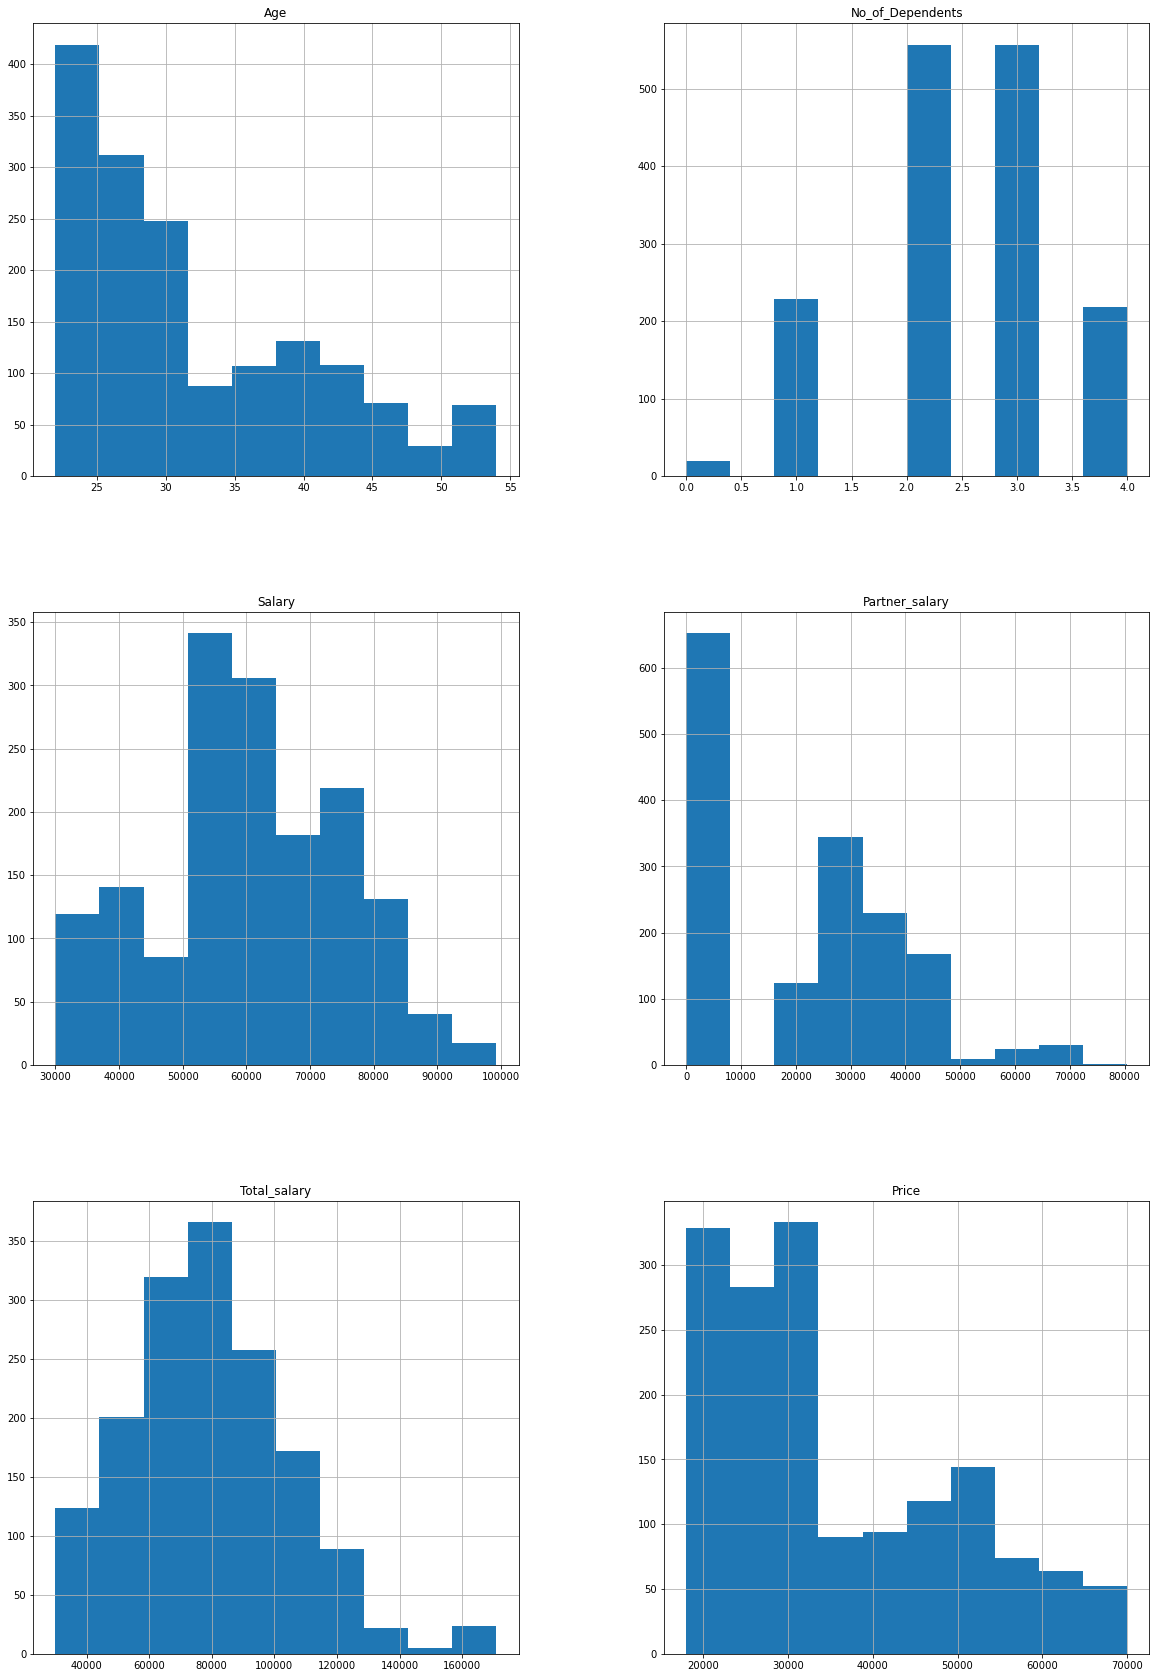

In [488]:
df.hist(figsize=(20,30))

3.Distribution of variables using countplot

<AxesSubplot:xlabel='Gender', ylabel='count'>

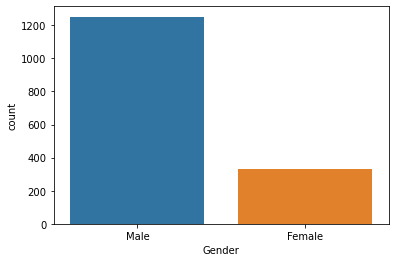

In [489]:
sns.countplot(x=df['Gender'])

<AxesSubplot:xlabel='Profession', ylabel='count'>

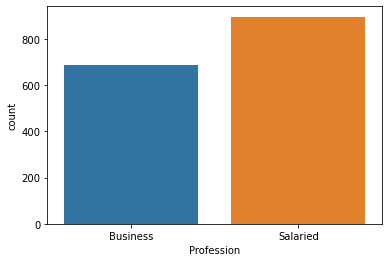

In [490]:
sns.countplot(x=df['Profession'])

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

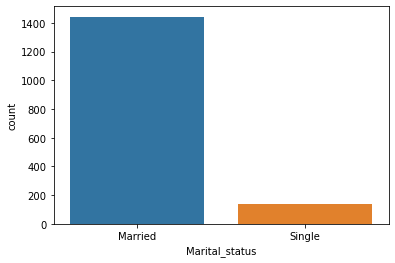

In [491]:
sns.countplot(x=df['Marital_status'])

<AxesSubplot:xlabel='Education', ylabel='count'>

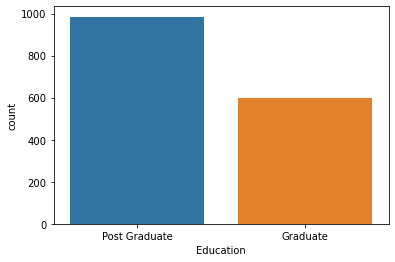

In [492]:
sns.countplot(x=df['Education'])

<AxesSubplot:xlabel='Personal_loan', ylabel='count'>

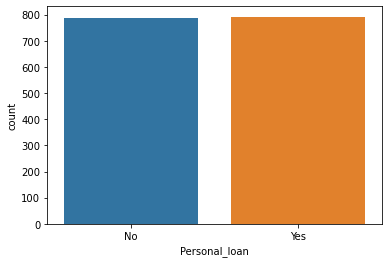

In [493]:
sns.countplot(x=df['Personal_loan'])

<AxesSubplot:xlabel='House_loan', ylabel='count'>

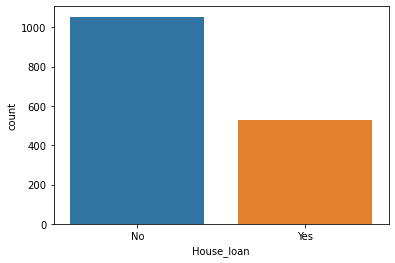

In [494]:
sns.countplot(x=df['House_loan'])

<AxesSubplot:xlabel='Partner_working', ylabel='count'>

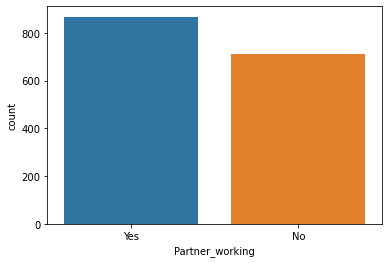

In [495]:
sns.countplot(x=df['Partner_working'])

<AxesSubplot:xlabel='Make', ylabel='count'>

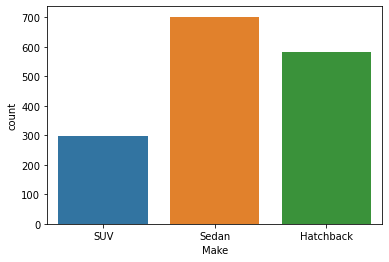

In [496]:
sns.countplot(x=df['Make'])

<AxesSubplot:xlabel='Gender', ylabel='Age'>

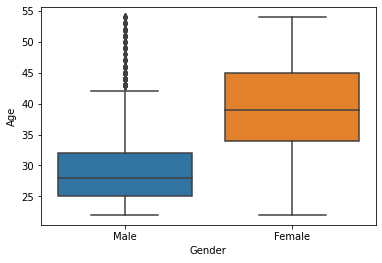

In [497]:
sns.boxplot(x="Gender", y="Age", data=df)

In [498]:
pd.crosstab(df['Make'],df['Gender'])

Gender,Female,Male
Make,,
Hatchback,15,567
SUV,173,124
Sedan,141,561


In [499]:
pd.crosstab(df['Make'],df['Marital_status'])

Marital_status,Married,Single
Make,,
Hatchback,498,84
SUV,281,16
Sedan,664,38


<AxesSubplot:xlabel='Age'>

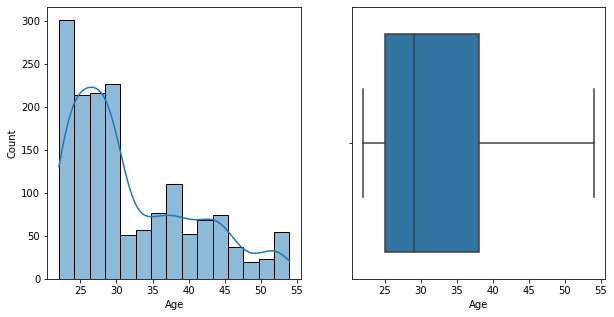

In [500]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.Age, kde=True, ax=axs[0])
sns.boxplot(x='Age',data=df, ax=axs[1])

<AxesSubplot:xlabel='Partner_salary'>

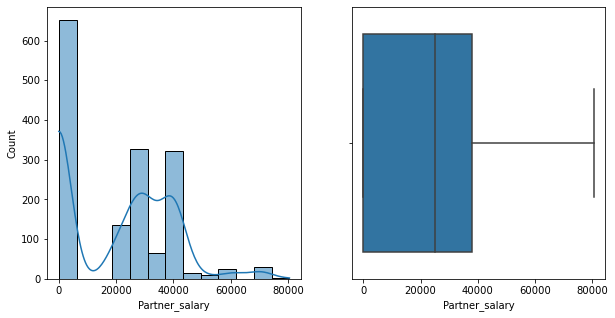

In [501]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.Partner_salary, kde=True, ax=axs[0])
sns.boxplot(x='Partner_salary',data=df, ax=axs[1])

Bivariate distribution using pairplot

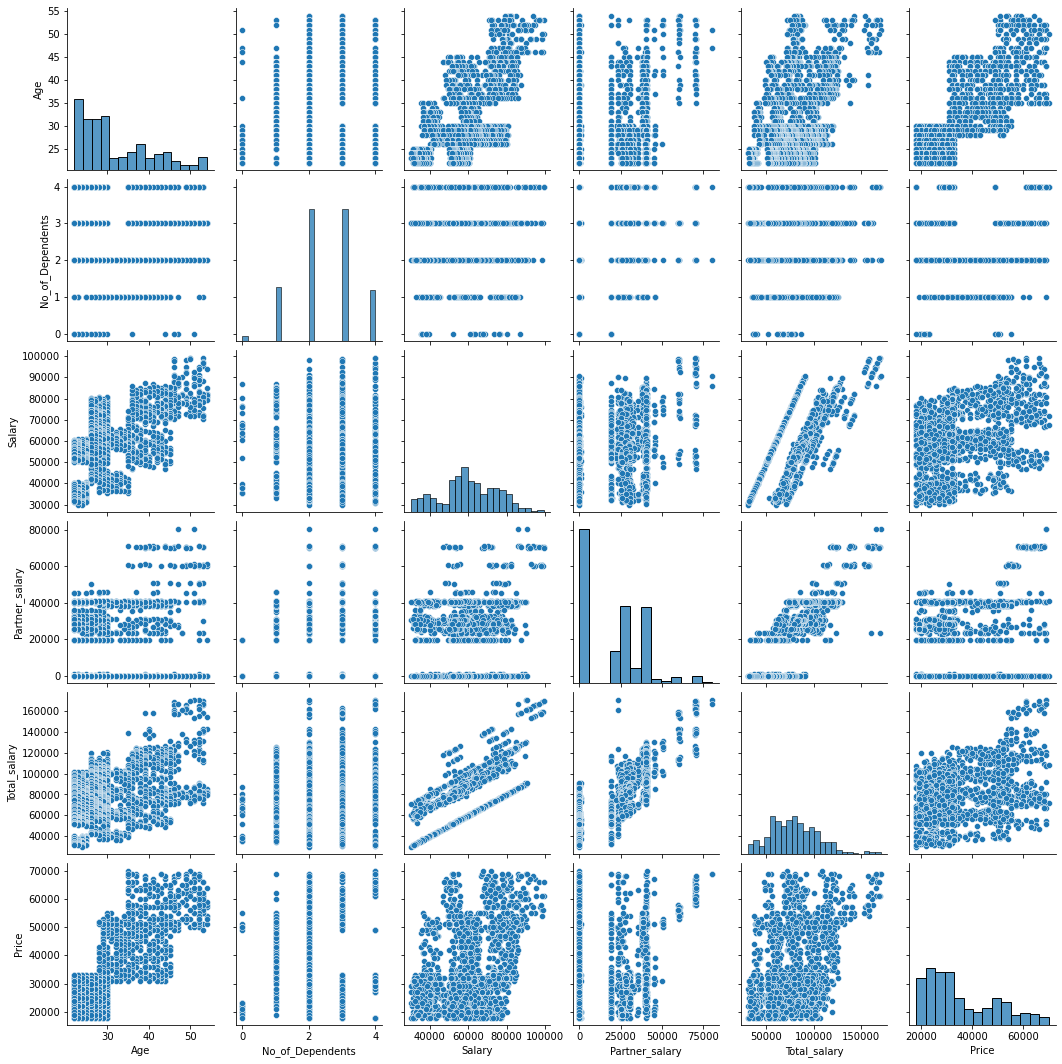

In [502]:
sns.pairplot(df)
plt.show()

Correlation using heatmap

In [503]:
corr = df.corr()
corr

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
Age,1.000000,-0.189614,0.616899,0.124410,0.458869,0.797831
No_of_Dependents,-0.189614,1.000000,-0.031746,0.124685,0.092890,-0.135839
Salary,0.616899,-0.031746,1.000000,0.069765,0.641560,0.409920
Partner_salary,0.124410,0.124685,0.069765,1.000000,0.780634,0.163870
Total_salary,0.458869,0.092890,0.641560,0.780634,1.000000,0.367823
Price,0.797831,-0.135839,0.409920,0.163870,0.367823,1.000000


<AxesSubplot:>

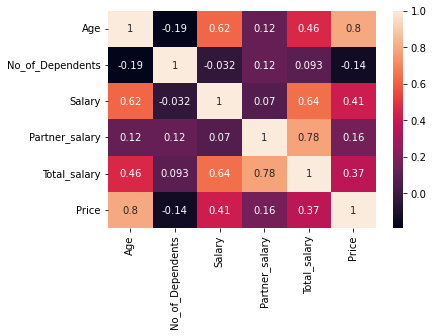

In [504]:
sns.heatmap(corr, annot=True)

4. Univariate Analysis using Age and no_of_dependents (numeric with numeric)

In [505]:
df[['Age','No_of_Dependents']].describe()

,Age,No_of_Dependents
count,1581.000000,1581.000000
mean,31.922201,2.457938
std,8.425978,0.943483
min,22.000000,0.000000
25%,25.000000,2.000000
50%,29.000000,2.000000
75%,38.000000,3.000000
max,54.000000,4.000000


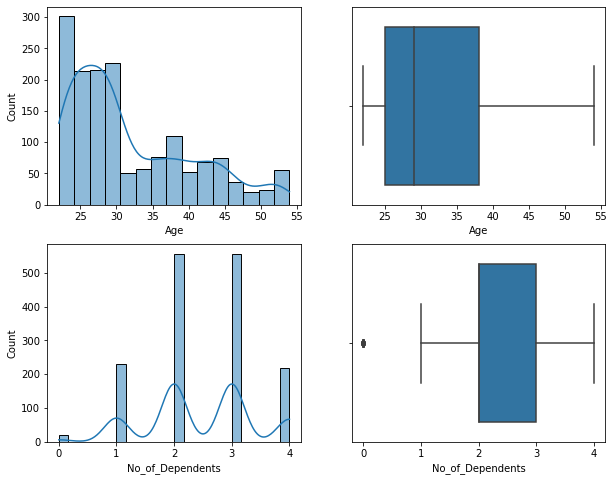

In [506]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['Age'], kde=True, ax=axes[0][0])
sns.boxplot(x='Age', data=df, ax=axes[0][1])
sns.histplot(df['No_of_Dependents'] , kde=True, ax=axes[1][0])
sns.boxplot(x='No_of_Dependents', data=df , ax=axes[1][1])
plt.show()

4. Analysis done using Total_salary and Partner_Salary

In [507]:
df[['Total_salary','Partner_salary']].describe()

,Total_salary,Partner_salary
count,1581.000000,1581.000000
mean,79625.996205,20230.655880
std,25545.857768,18909.850652
min,30000.000000,0.000000
25%,60500.000000,0.000000
50%,78000.000000,24900.000000
75%,95900.000000,38000.000000
max,171000.000000,80500.000000


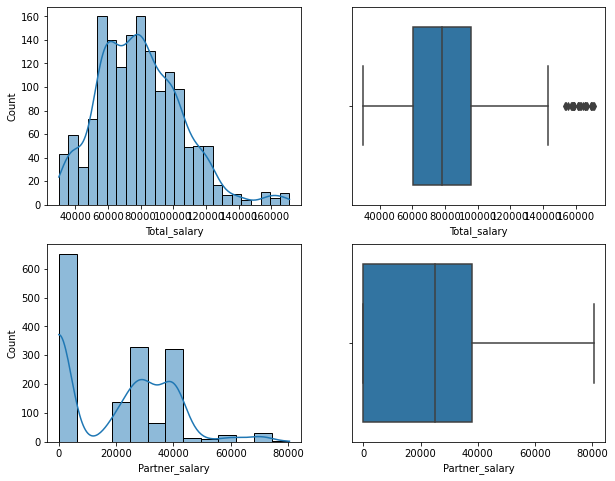

In [508]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['Total_salary'], kde=True, ax=axes[0][0])
sns.boxplot(x='Total_salary', data=df, ax=axes[0][1])
sns.histplot(df['Partner_salary'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Partner_salary', data=df , ax=axes[1][1])
plt.show()

4. Categorical variable using Gender

In [509]:
df['Gender'].value_counts(normalize=True)

Male      0.791904
Female    0.208096
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

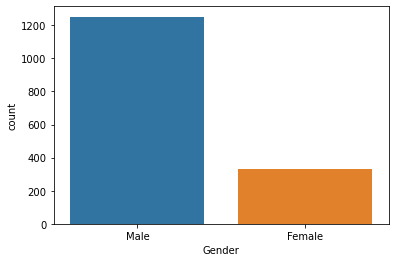

In [510]:
sns.countplot(x='Gender', data=df)

4. Categorical variable using Profession

In [511]:
df['Profession'].value_counts(normalize=True)

Salaried    0.56673
Business    0.43327
Name: Profession, dtype: float64

<AxesSubplot:xlabel='Profession', ylabel='count'>

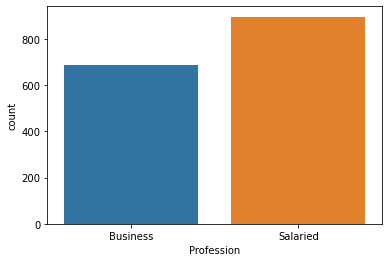

In [512]:
sns.countplot(x='Profession', data=df)

4. Bivariate Analysis using 2 numeric variables such as Salary and Price

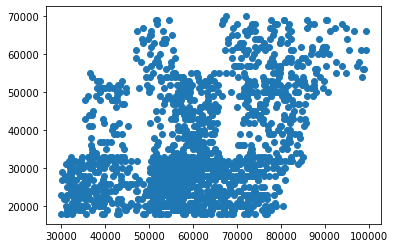

In [513]:
plt.scatter(df['Salary'],df['Price'])

4. Analysis using 2 categorical variables Marital_status and Partner_working

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

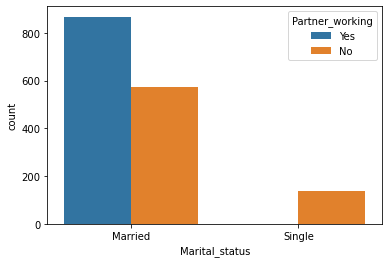

In [514]:
sns.countplot(x='Marital_status', hue='Partner_working', data=df)

In [515]:
pd.crosstab(df['Marital_status'], df['Partner_working'], margins=True, normalize = True)

Partner_working,No,Yes,All
Marital_status,,,
Married,0.363694,0.54902,0.912713
Single,0.087287,0.00000,0.087287
All,0.450980,0.54902,1.000000


4. Analysis using categorical variable with numeric variable such as Salary and Profession

<AxesSubplot:xlabel='Salary', ylabel='Profession'>

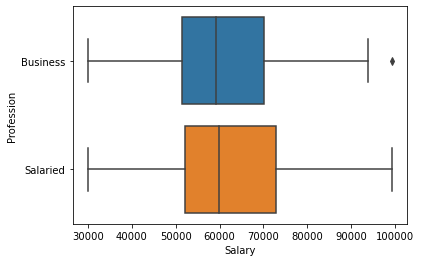

In [516]:
fig_dims = (12, 5)
sns.boxplot(x='Salary', y='Profession', data=df)

4. Let’s analyze with some more variables using Total_salary and Personal_loan

<AxesSubplot:xlabel='Total_salary', ylabel='Personal_loan'>

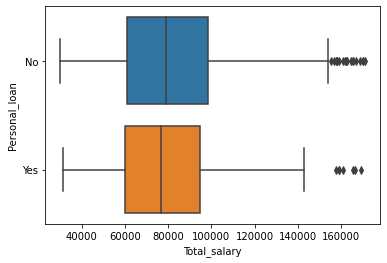

In [517]:
fig_dims = (12, 5)
sns.boxplot(x='Total_salary', y='Personal_loan', data=df)

4. Multivariate Analysis using Marital_status , Age , Gender. 

<AxesSubplot:xlabel='Marital_status', ylabel='Age'>

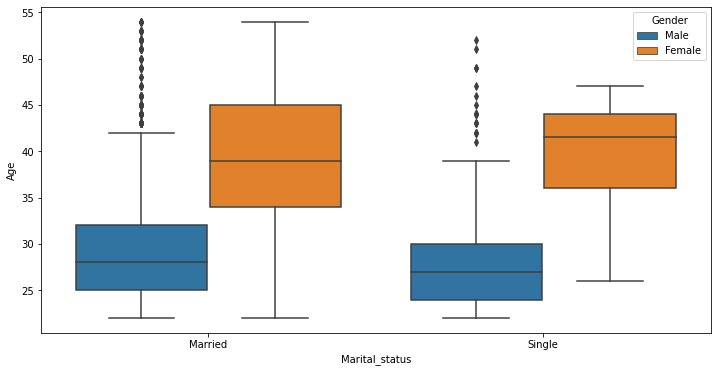

In [518]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Marital_status', y='Age', hue='Gender',data=df)

4. Now let’s draw some more insights with the help of more than 2 variables using FacetGrid

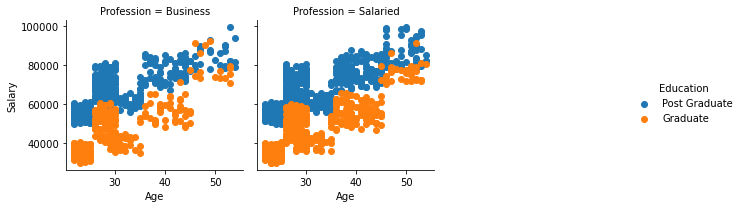

In [519]:
g = sns.FacetGrid(df, col="Profession", hue='Education',col_wrap=3, height=3)
g = g.map(plt.scatter, "Age", 'Salary')
g.add_legend()

4. Skewness

In [520]:
pd.DataFrame({'Skewness' : [stats.skew(df.Age),stats.skew(df.No_of_Dependents),stats.skew(df.Salary),stats.skew(df.Total_salary),stats.skew(df.Price),stats.skew(df.Partner_salary)]},
                        index=['Age','No_of_Dependents','Salary','Total_salary','Price','Partner_salary'])

,Skewness
Age,0.892240
No_of_Dependents,-0.129685
Salary,-0.011560
Total_salary,0.609127
Price,0.740171
Partner_salary,0.348835


4. Checking for outliers

<AxesSubplot:>

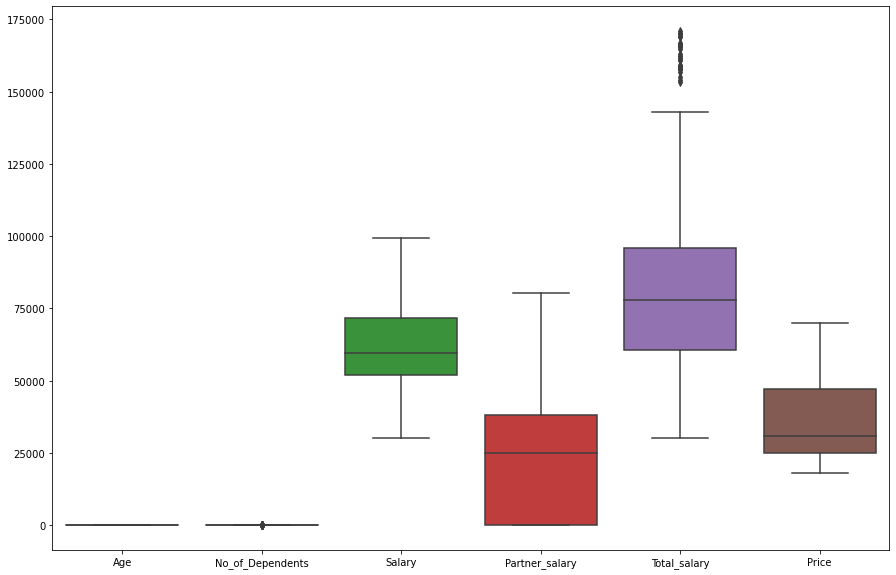

In [521]:
plt.figure(figsize= (15,10))
sns.boxplot(data=df)

4. To remove outliers

In [522]:
def outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur  

In [523]:
lr1,ur1=outlier(df['Total_salary'])
df['Total_salary']=np.where(df['Total_salary']>ur1,ur1,df['Total_salary'])
df['Total_salary']=np.where(df['Total_salary']<lr1,lr1,df['Total_salary'])

In [524]:
lr2,ur2=outlier(df['No_of_Dependents'])
df['No_of_Dependents']=np.where(df['No_of_Dependents']>ur2,ur2,df['No_of_Dependents'])
df['No_of_Dependents']=np.where(df['No_of_Dependents']<lr2,lr2,df['No_of_Dependents'])

4. Once outliers are removed then : 

<AxesSubplot:>

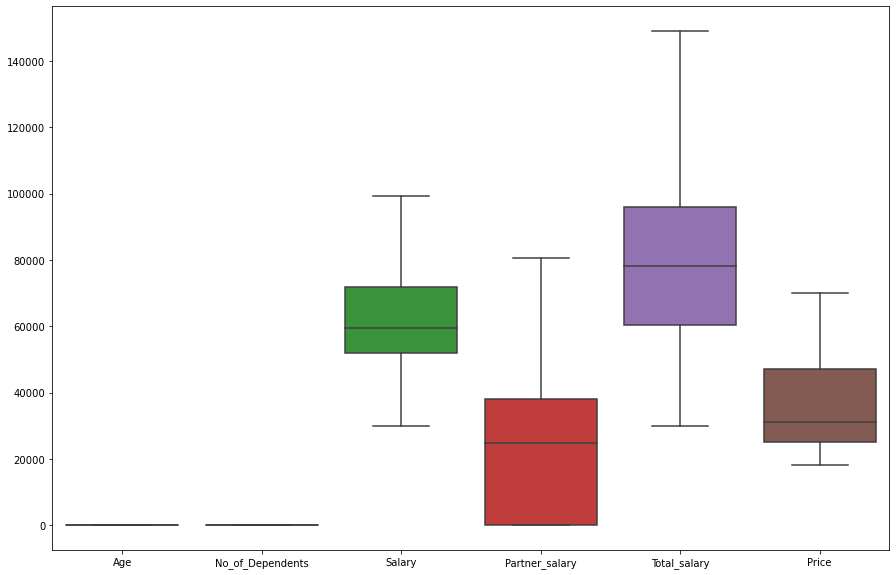

In [525]:
plt.figure(figsize= (15,10))
sns.boxplot(data=df)

4. Encoding

In [526]:
df['Gender'].value_counts()

Male      1252
Female     329
Name: Gender, dtype: int64

4. Label Encoding

In [527]:
df.Gender.replace(to_replace = 'Male', value='0')

0            0
1       Female
2       Female
3       Female
4            0
         ...  
1576         0
1577         0
1578         0
1579         0
1580         0
Name: Gender, Length: 1581, dtype: object

In [528]:
df.Gender.replace(to_replace = 'Female', value='1')

0       Male
1          1
2          1
3          1
4       Male
        ... 
1576    Male
1577    Male
1578    Male
1579    Male
1580    Male
Name: Gender, Length: 1581, dtype: object

In [529]:
df['Gender'].value_counts()

Male      1252
Female     329
Name: Gender, dtype: int64

5. E1

In [530]:
df.groupby('Gender')['Make'].value_counts()

Gender  Make     
Female  SUV          173
        Sedan        141
        Hatchback     15
Male    Hatchback    567
        Sedan        561
        SUV          124
Name: Make, dtype: int64

<AxesSubplot:xlabel='Make', ylabel='count'>

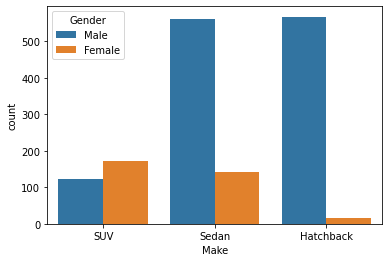

In [531]:
sns.countplot(x="Make", hue="Gender", data=df)

In [532]:
df.groupby('Profession')['Make'].value_counts()

Profession  Make     
Business    Sedan        306
            Hatchback    290
            SUV           89
Salaried    Sedan        396
            Hatchback    292
            SUV          208
Name: Make, dtype: int64

5. E2

<AxesSubplot:xlabel='Profession', ylabel='count'>

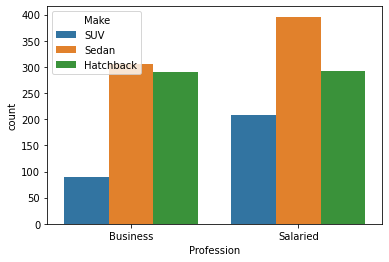

In [533]:
sns.countplot(x="Profession", hue="Make", data=df)

5. E3

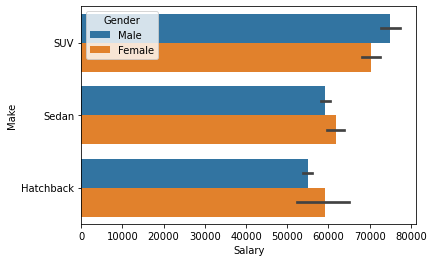

In [534]:
sns.barplot(x='Salary' , y='Make' , hue = 'Gender' , data=df);

6. F

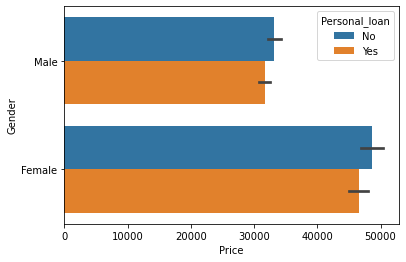

In [535]:
sns.barplot(x='Price' , y='Gender' , hue = 'Personal_loan' , data=df);

6. G

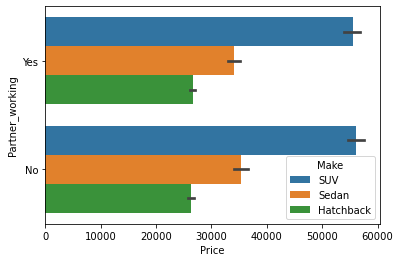

In [536]:
sns.barplot(x='Price' , y='Partner_working' , hue = 'Make' , data=df);

6.H1

<AxesSubplot:xlabel='Price', ylabel='Marital_status'>

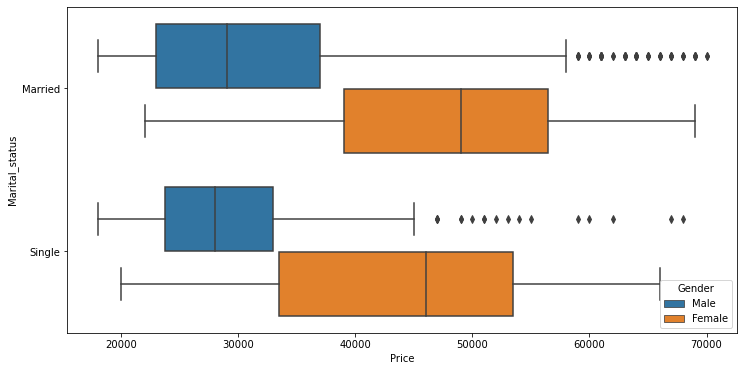

In [537]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Price', y='Marital_status', hue='Gender',data=df)

6.H2

<AxesSubplot:xlabel='Price', ylabel='Gender'>

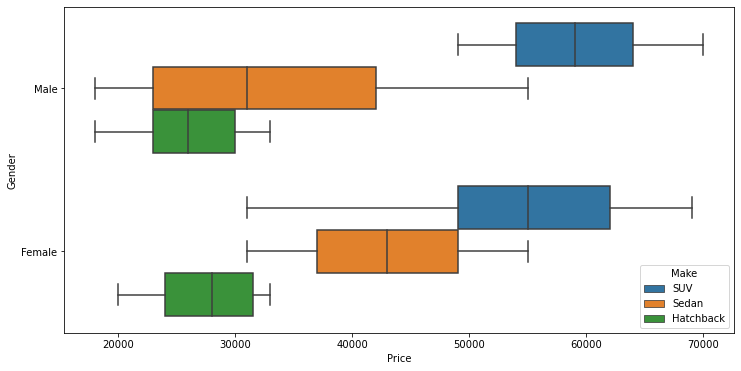

In [538]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Price', y='Gender', hue='Make',data=df)

6.H3

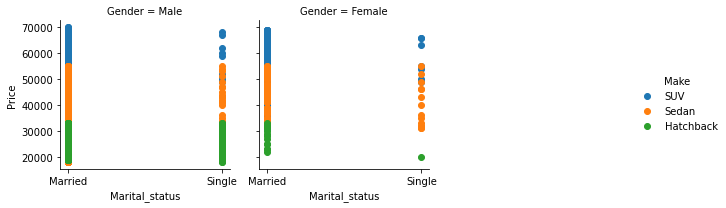

In [539]:
g = sns.FacetGrid(df, col="Gender", hue='Make',col_wrap=3, height=3)
g = g.map(plt.scatter, "Marital_status", 'Price')
g.add_legend()

PROBLEM 2

In [540]:
df1 = pd.read_excel('godigt_cc_data.xlsx')

In [541]:
df1.head(2)

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000


In [542]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [543]:
df1.shape

(8448, 28)

In [544]:
df1.columns

Index(['userid', 'card_no', 'card_bin_no', 'Issuer', 'card_type',
       'card_source_date', 'high_networth', 'active_30', 'active_60',
       'active_90', 'cc_active30', 'cc_active60', 'cc_active90',
       'hotlist_flag', 'widget_products', 'engagement_products',
       'annual_income_at_source', 'other_bank_cc_holding', 'bank_vintage',
       'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity', 'Transactor_revolver',
       'avg_spends_l3m', 'Occupation_at_source', 'cc_limit'],
      dtype='object')

In [545]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,8448.0,4.224500e+03,2.438872e+03,1.0,2112.75,4224.5,6336.25,8448.0
card_bin_no,8448.0,4.367470e+05,3.048975e+04,376916.0,426241.00,437551.0,438439.00,524178.0
active_30,8448.0,2.923769e-01,4.548815e-01,0.0,0.00,0.0,1.00,1.0
active_60,8448.0,4.947917e-01,5.000025e-01,0.0,0.00,0.0,1.00,1.0
active_90,8448.0,6.420455e-01,4.794271e-01,0.0,0.00,1.0,1.00,1.0
cc_active30,8448.0,2.840909e-01,4.510070e-01,0.0,0.00,0.0,1.00,1.0
cc_active60,8448.0,4.844934e-01,4.997891e-01,0.0,0.00,0.0,1.00,1.0
cc_active90,8448.0,6.323390e-01,4.821970e-01,0.0,0.00,1.0,1.00,1.0
widget_products,8448.0,3.614583e+00,2.273193e+00,0.0,2.00,4.0,6.00,7.0
engagement_products,8448.0,3.991122e+00,2.572135e+00,0.0,2.00,4.0,6.00,8.0


In [546]:
df1['cc_limit'].mean()

251706.91287878787

In [547]:
df1['cc_limit'].median()

150000.0

In [548]:
df1['avg_spends_l3m'].mean()

49527.36553030303

In [549]:
df1['avg_spends_l3m'].median()

37943.0

In [550]:
df1['active_90'].mean()

0.6420454545454546

In [551]:
df1['active_90'].median()

1.0

In [552]:
df1.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

In [553]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df1[dups]

Number of duplicate rows = 0


,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit


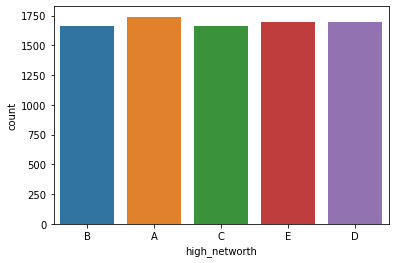

In [554]:
sns.countplot(x=df1['high_networth']);

In [555]:
df1['high_networth'].value_counts()

A    1740
D    1696
E    1693
B    1660
C    1659
Name: high_networth, dtype: int64

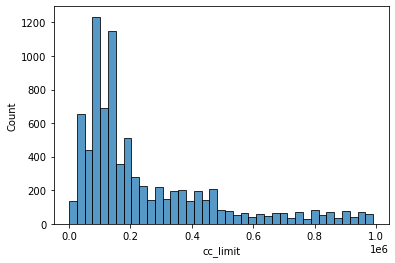

In [556]:
sns.histplot(x=df1['cc_limit']);

In [557]:
df1['cc_limit'].max()

990000

<AxesSubplot:xlabel='other_bank_cc_holding', ylabel='count'>

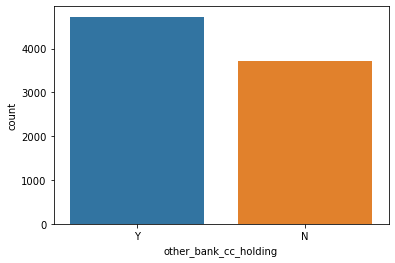

In [558]:
sns.countplot(x=df1['other_bank_cc_holding'])

In [559]:
df1['other_bank_cc_holding'].value_counts()

Y    4728
N    3720
Name: other_bank_cc_holding, dtype: int64

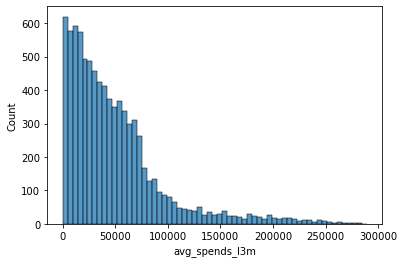

In [560]:
sns.histplot(x=df1['avg_spends_l3m']);

In [561]:
df1['avg_spends_l3m'].max()

289292

<AxesSubplot:xlabel='active_90', ylabel='count'>

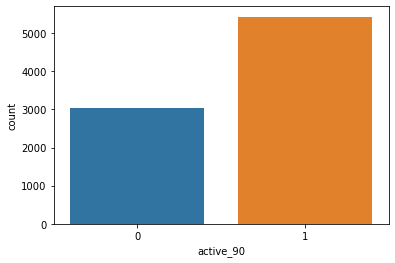

In [562]:
sns.countplot(x=df1['active_90'])

In [563]:
df1['active_90'].value_counts()

1    5424
0    3024
Name: active_90, dtype: int64

In [564]:
df1.other_bank_cc_holding.replace(to_replace='Y', value=0, inplace=True)
df1.other_bank_cc_holding.replace(to_replace='N', value=1, inplace=True)

In [565]:
df1['other_bank_cc_holding'].value_counts()

0    4728
1    3720
Name: other_bank_cc_holding, dtype: int64

In [566]:
df1.high_networth.replace(to_replace='A', value=0, inplace=True)
df1.high_networth.replace(to_replace='B', value=1, inplace=True)
df1.high_networth.replace(to_replace='C', value=2, inplace=True)
df1.high_networth.replace(to_replace='D', value=3, inplace=True)
df1.high_networth.replace(to_replace='E', value=4, inplace=True)

In [567]:
df1['high_networth'].value_counts()

0    1740
3    1696
4    1693
1    1660
2    1659
Name: high_networth, dtype: int64

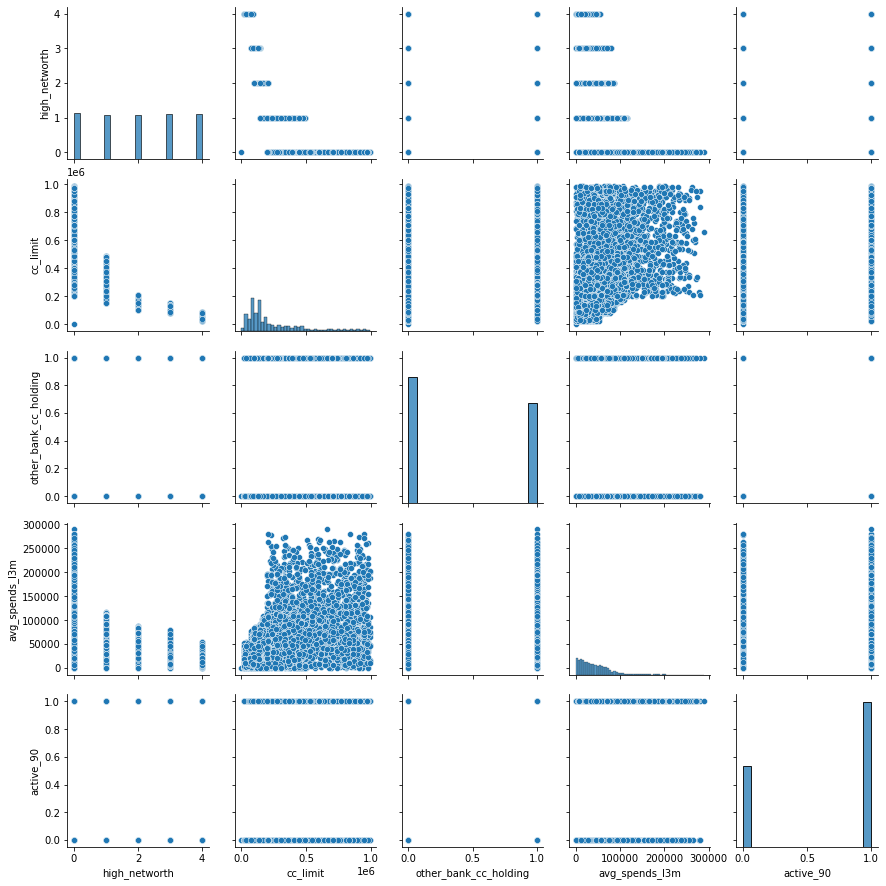

In [568]:
sns.pairplot(df1[['high_networth', 'cc_limit', 'other_bank_cc_holding', 'avg_spends_l3m', 'active_90']]);

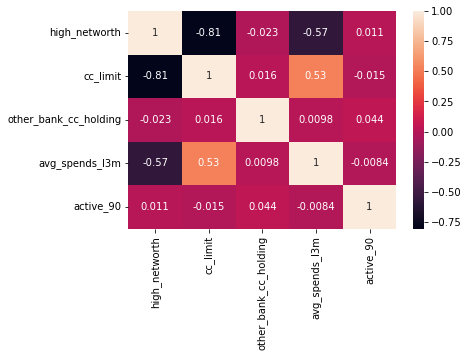

In [569]:
sns.heatmap(df1[['high_networth', 'cc_limit', 'other_bank_cc_holding', 'avg_spends_l3m', 'active_90']].corr(), annot=True);

<AxesSubplot:xlabel='high_networth'>

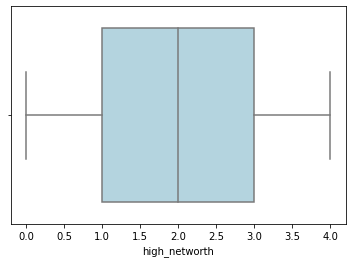

In [570]:
sns.boxplot(x= df1.high_networth, color='lightblue')

<AxesSubplot:xlabel='cc_limit'>

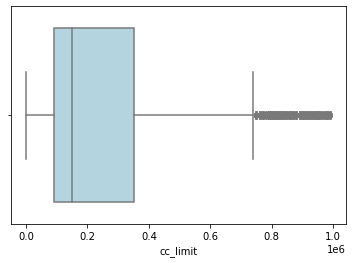

In [571]:
sns.boxplot(x= df1.cc_limit, color='lightblue')

<AxesSubplot:xlabel='other_bank_cc_holding'>

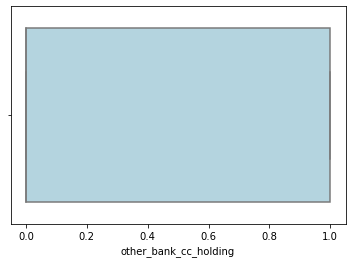

In [572]:
sns.boxplot(x= df1.other_bank_cc_holding, color='lightblue')

<AxesSubplot:xlabel='avg_spends_l3m'>

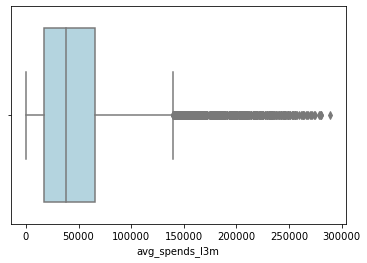

In [573]:
sns.boxplot(x= df1.avg_spends_l3m, color='lightblue')

<AxesSubplot:xlabel='active_90'>

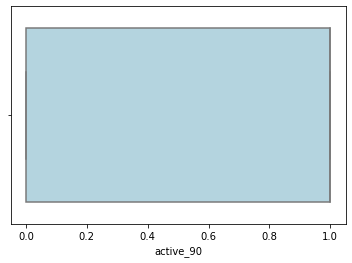

In [574]:
sns.boxplot(x= df1.active_90, color='lightblue')